In [1]:
### Import des bibliothèques

In [32]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
### Import des données de bases 

In [4]:
df = pd.read_csv('./33000-BORDEAUX_nettoye.csv')

In [5]:
df.columns
print(df.isnull().sum())
df.shape

Identifiant                0
Url                        0
Titre                      0
PrixNuitee                 0
Latitude                   0
                        ... 
Caution                    0
conditions_annulation    965
Description                4
reglement_interieur      862
duree_minimale_sejour      0
Length: 61, dtype: int64


(5237, 61)

In [6]:
### Répartition des prix pour une nuit dans chaque logement. 

<AxesSubplot:xlabel='PrixNuitee', ylabel='Count'>

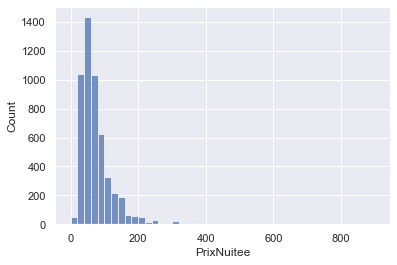

In [7]:
# Setting seaborn as default style even if use only matplotlib
sns.set() 
sns.histplot(data=df, x="PrixNuitee", binwidth=20)

In [8]:
df.corr()[['PrixNuitee']].sort_values(by='PrixNuitee', ascending=False)

,PrixNuitee
PrixNuitee,1.000000
prix_nuitee,1.000000
NbChambres,0.632813
Capacite_accueil,0.629278
Caution,0.444072
frais_menage,0.412444
seche_linge,0.252450
cheminee_interieur,0.216834
pourEnfants_famille,0.197721
Piscine,0.197167


In [9]:
nan_df = df.isnull().sum()
for i in range(len(nan_df)):
    if df.isnull().sum()[i]!=0 :
        print(str(df.columns[i]) + "   " + str(df.isnull().sum()[i]))

print("shape dataframe : " + str(df.shape))

Resume   1
type_lit   2862
Animal_sur_place   4847
conditions_annulation   965
Description   4
reglement_interieur   862
shape dataframe : (5237, 61)


In [10]:
df.drop(columns=["Identifiant", "Url"],inplace = True)

In [11]:
df=df[df.prix_nuitee>0].copy()

In [12]:
#Valeurs différentes pour la colonne conditions_annulation
print(df['conditions_annulation'].unique())

[nan 'Modérées' 'Strictes' 'Flexibles']


In [13]:
#Supprimer colonne conditions_annulation
df.drop(columns=["conditions_annulation"],inplace = True)

In [14]:
#Valeurs différentes pour la colonne Animal_sur_place 
print(df['Animal_sur_place'].unique())

['Chien(s)' nan 'Certains animaux' 'Chat(s)' 'Autres animaux'
 'Chien(s) et Chat(s)' 'Chat(s) et Autres animaux'
 'Chien(s) et Autres animaux']


In [15]:
#0 si pas d'animaux 1 sinon
df.loc[df.Animal_sur_place.isnull(),'Animal_sur_place']=0
df.loc[df.Animal_sur_place!=0,'Animal_sur_place']=1

In [16]:
#Valeurs différentes pour la colonne type_lit
print(df['type_lit'].unique())

[nan 'Vrai lit' 'Canapé convertible' 'Canapé']


In [17]:
#1 si vrai lit 0 sinon
df.loc[df.type_lit.isnull(),'type_lit']=1
df.loc[df.type_lit=="Vrai lit",'type_lit']=1
df.loc[df.type_lit!=1,'type_lit']=0

In [18]:
#Supprimer colonne reglement_interieur
df.drop(columns=["reglement_interieur"],inplace = True)

In [19]:
#Suppression ligne résumé null
df.dropna(subset = ["Resume","Description"],inplace = True)

In [20]:
#Supprimer colonne prix_nuitee car en double
df.drop(columns=["prix_nuitee"],inplace = True)

In [21]:
# affiche le nombre de NaN par colonned
print(df.isnull().sum())
df.shape

Titre                      0
PrixNuitee                 0
Latitude                   0
Longitude                  0
Resume                     0
Capacite_accueil           0
NombreSdB                  0
NbChambres                 0
NbLits                     0
Type_logement              0
type_propriete             0
type_lit                   0
Animal_sur_place           0
Cuisine                    0
Internet                   0
television                 0
produits_base              0
Shampooing                 0
Chauffage                  0
Climatisation              0
machine_laver              0
seche_linge                0
parking_sur-place          0
wifi                       0
television_cable           0
petit_dejeuner             0
animaux_acceptes           0
pourEnfants_famille        0
adapte_evenements          0
logement_fumeur            0
accessibilite              0
Ascenseur                  0
cheminee_interieur         0
Interphone                 0
Portier       

(5233, 56)

In [22]:
#Valeurs différentes pour la colonne type_propriete
print(df['type_propriete'].unique())

['Maison' 'Appartement' 'Bed & Breakfast' 'Maison de ville' 'Loft'
 'Cabane' 'Appartement en résidence' 'Bungalow' 'Inconnue'
 'Maison écologique' 'Villa' 'Dortoir' 'Autre']


In [23]:
# creation d'une colonne pour chaque type de propriété
dummy_df = pd.get_dummies(df["type_propriete"])
df = pd.concat([df, dummy_df], axis=1)
df = df.drop("type_propriete", axis=1)
df = df.drop("Autre", axis=1)
df = df.drop("Inconnue", axis=1)

In [24]:
#Valeurs différentes pour la colonne type_logement
print(df['Type_logement'].unique())

['Chambre privée' 'Logement entier' 'Chambre partagée']


In [25]:
#1 si vrai lit 0 sinon
df.loc[df.Type_logement=="Logement entier",'Type_logement']=1
df.loc[df.Type_logement=="Chambre privée",'Type_logement']=2
df.loc[df.Type_logement=="Chambre partagée",'Type_logement']=3

In [26]:
# Suppression colonne Identifiant et Url
df.drop(columns=["Description", "Titre","Resume"],inplace = True)

In [27]:
df.drop(columns=["Shampooing","NbLits"], inplace = True)

In [28]:
df.drop(columns=["Entree_24-24","Portier", "Interphone","kit_secours"], inplace = True)

<AxesSubplot:>

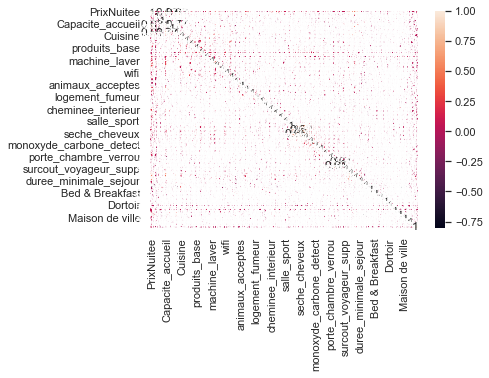

In [29]:
sns.heatmap(df.corr(), annot=True )

In [30]:
df['log_price'] = np.log(df['PrixNuitee'])
df.drop(columns=["PrixNuitee"],inplace = True)
df.corr()[['log_price']].sort_values(by='log_price', ascending=False)

,log_price
log_price,1.000000
Capacite_accueil,0.652862
NbChambres,0.609373
Caution,0.461833
frais_menage,0.426854
seche_linge,0.273419
pourEnfants_famille,0.260144
television,0.231473
cheminee_interieur,0.199197
machine_laver,0.180832


Skewness: 0.596355
Kurtosis: 0.749755


/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


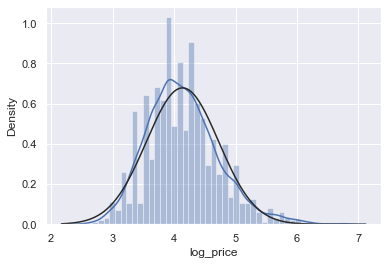

<Figure size 432x288 with 0 Axes>

In [33]:
import seaborn as sns
from scipy.stats import norm
#histogram and normal probability plot
sns.distplot(df['log_price'], fit=norm);
fig = plt.figure()
# res = stats.probplot(df['log_price'], plot=plt)

#skewness and kurtosis
print("Skewness: %f" % df['log_price'].skew())
print("Kurtosis: %f" % df['log_price'].kurt())

count    5233.000000
mean        3.327346
std         1.687008
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        16.000000
Name: Capacite_accueil, dtype: float64


<AxesSubplot:xlabel='Capacite_accueil', ylabel='Count'>

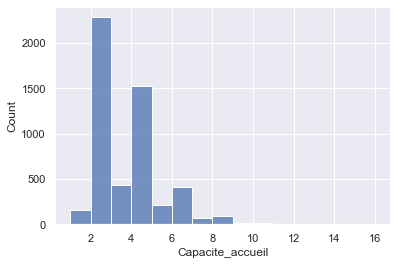

In [63]:
print(df["Capacite_accueil"].describe())
sns.set() 
sns.histplot(data=df, x="Capacite_accueil", binwidth=1)

In [64]:
y = df.pop('log_price')
X = df

In [65]:
y=y.to_numpy()

In [66]:
from sklearn.model_selection import train_test_split

# création d'une liste train et une liste test
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 100)

In [67]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [68]:
df.head()

,Latitude,Longitude,Capacite_accueil,NombreSdB,NbChambres,Type_logement,type_lit,Animal_sur_place,Cuisine,Internet,...,Appartement en résidence,Bed & Breakfast,Bungalow,Cabane,Dortoir,Loft,Maison,Maison de ville,Maison écologique,Villa
0,44.849101,-0.593501,2,2,1,2,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0
1,44.856533,-0.574601,2,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,44.830634,-0.593309,2,3,1,2,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,44.836383,-0.566032,4,15,2,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,44.837695,-0.573713,4,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [69]:
from sklearn.linear_model import LinearRegression

modellinear = LinearRegression()
modellinear.fit(X_train_scaled,y_train)
predic = modellinear.predict([X_test_scaled[14]])
print(predic)
print(y_test[14])
print('diff = ',y_test[14]-predic )

[3.84303518]
3.828641396489095
diff =  [-0.01439378]


In [70]:
accurancy = modellinear.score(X_test_scaled,y_test)
print('accurancy Price test : ',accurancy)

accurancy = modellinear.score(X_train_scaled,y_train)
print('accurancy Price train : ',accurancy)

accurancy Price test :  0.5807205100566499
accurancy Price train :  0.6248972956135905


In [71]:
from sklearn.linear_model import Ridge

# create a model Ridge, train it on the same training
# set made of the Housing market and evaluate its
# training score and test score. Do you have any improvement ?
# Is it better compared to a model with no regularization?

modelRidge = Ridge()
modelRidge.fit(X_train_scaled,y_train)

accurancy = modelRidge.score(X_test_scaled,y_test)
print('accurancy Price test : ',accurancy)

accurancy = modelRidge.score(X_train_scaled,y_train)
print('accurancy Price train : ',accurancy)

accurancy Price test :  0.5807309844300648
accurancy Price train :  0.6248972149478644


In [72]:
from sklearn.linear_model import BayesianRidge

reg = BayesianRidge()
reg.fit(X_train_scaled, y_train)
predic = reg.predict([X_test_scaled[12]])
print(predic)
print(y_test[12])
print('diff = ',y_test[12]-predic )
reg.coef_

accurancy = reg.score(X_test_scaled,y_test)
print('accurancy Price test : ',accurancy)

accurancy = reg.score(X_train_scaled,y_train)
print('accurancy Price train : ',accurancy)

[3.50569191]
4.174387269895637
diff =  [0.66869536]
accurancy Price test :  0.5810731578780312
accurancy Price train :  0.6247723683307904


### Gestion du texte

In [73]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def preprocess(sentence):
    sentence=str(sentence)
    # Lowercase text
    sentence = sentence.lower()
    # Remove whitespace
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    # Remove weblinks
    rem_url=re.sub(r'http\S+', '',cleantext)
    # Remove numbers
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    # Remove StopWords
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('french')]
    # Use lemmatization
    #lemma_words=[lemmatizer.lemmatize(w) for w in filtered_words]
    return " ".join(filtered_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/matthieuburban/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/matthieuburban/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/matthieuburban/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [36]:
# preprocess les textes
df = pd.read_csv('./33000-BORDEAUX_nettoye.csv')

In [37]:
df.head()

,Identifiant,Url,Titre,PrixNuitee,Latitude,Longitude,Resume,Capacite_accueil,NombreSdB,NbChambres,...,prix_nuitee,rection_semaine,reduction_mois,surcout_voyageur_supp,frais_menage,Caution,conditions_annulation,Description,reglement_interieur,duree_minimale_sejour
0,28925,https://www.airbnb.fr/rooms/28925,4 chambres dans Bordeaux centre,25,44.849101,-0.593501,J'habite une grande maison que je partage tout...,2,2,1,...,25,5,35,25,23,400,NaN,"Le logement\n\nWe speak english, wir sprechen ...",Notre maison est un lieu familial donc vivant ...,1
1,40151,https://www.airbnb.fr/rooms/40151,Sunny flat aux Chartrons,71,44.856533,-0.574601,"Situé dans le quartier des Chartrons, cet appa...",2,1,1,...,71,30,42,0,10,0,Modérées,Le logement\n\nSitué dans le quartier des Char...,L'appartement est non fumeur.\n\nVous pouvez n...,3
2,185534,https://www.airbnb.fr/rooms/185534,L'Echoppe des Bouilles,75,44.830634,-0.593309,L’Échoppe des Bouilles est une maison typique ...,2,3,1,...,75,0,0,0,0,0,Strictes,Le logement\n\nL’Échoppe des Bouilles est une ...,L'entrée dans les lieux se fait après 16:00\n\n,1
3,222887,https://www.airbnb.fr/rooms/222887,Terrace with spectacular view,155,44.836383,-0.566032,Bordeaux Terrace is a two bedroom apartment in...,4,15,2,...,155,20,30,0,100,200,Modérées,Bordeaux Terrace is a two bedroom apartment in...,L'entrée dans les lieux se fait après 15:00\n\...,3
4,286581,https://www.airbnb.fr/rooms/286581,Appartement charme bordeaux centre,80,44.837695,-0.573713,Appartement avec beaucoup de cachet de 45m2 da...,4,1,1,...,80,15,35,10,0,400,Modérées,Le logement\n\nAppartement avec beaucoup de ca...,Ne convient pas aux animaux\n\nPas de fête ni ...,1


In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,4.5) # Make the default figures a bit bigger

import numpy as np
import pandas as pd
import random

#Let's make this notebook reproducible 
np.random.seed(42)
random.seed(42)

import seaborn as sb
import string
from pandas import DataFrame
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.corpus import stopwords
import nltk
from sklearn.decomposition import NMF
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, pairwise
import pydotplus 
from IPython.display import Image  

In [39]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/matthieuburban/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/matthieuburban/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [40]:
desc = df["Description"]

In [41]:
desc = desc.dropna()
desc = desc.str.lower()

replacements = {'\\n':' ', 'ñ':'n', 'u2028':'', '\. ':' ', ':':'', ';':'', ':':'', '-\t':'', '- ':' ', '\t':'', '/':' ', '(':'',
                ',':' ', '#':'', '\\':'', '\'':'', '"':'', '&\d+':'', 'cis-lunar':'cislunar', 'cis lunar':'cislunar', ' \d ':' ',
                '>|<':'', '\d+':'', '~':'', 'et al':'', 'in flight':'in-flight', 'on-board':'onboard', 'on board':'onboard',
                'on-ground':'onground', 'on ground':'onground', 'fact sheet':'', '-':'', 'e\.g':'', 'etc\.':'', '\?':'', '  +':' ',
                '[\0\200-\377\2028]':'', '“':'', '”':'', '’s':'', '\\+':'', '\\-':'', '\\@':'', 's’':'', 'baueresa':'', 'markus':'',
                'tel':'', 'int':'', 'email':'', 'bauer':'', 'let':'', 'astrium':'', 'could':''}

for value in replacements:
    desc = desc.str.replace(value, replacements[value])

df['desc'] = desc
df['desc'].head()

/var/folders/t6/t5h5090d6mb3hs8y3fgw7s8c0000gn/T/ipykernel_1148/1999447705.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  desc = desc.str.replace(value, replacements[value])
/var/folders/t6/t5h5090d6mb3hs8y3fgw7s8c0000gn/T/ipykernel_1148/1999447705.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  desc = desc.str.replace(value, replacements[value])


0    le logement we speak english wir sprechen deut...
1    le logement situ dans le quartier des chartron...
2    le logement l’choppe des bouilles est une mais...
3    bordeaux terrace is a two bedroom apartment in...
4    le logement appartement avec beaucoup de cache...
Name: desc, dtype: object

In [42]:
stop_words = stopwords.words('french')
stop_words += stopwords.words('english')
print(stop_words)

['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai', 'auras', 'aura', 'aurons', 'aur

In [43]:
def stem_texts(desc):
    stop_words = stopwords.words('french') + stopwords.words('english')
    stop_words.extend([])
    stemmer = WordNetLemmatizer()
    stemmed_list = []
    
    for line in desc:
        stemmed_line = ''
        for word in line.split(' '):
            if word in stop_words:
                continue
            stemmed = stemmer.lemmatize(word)
            stemmed_line += stemmed + ' '
        stemmed_list.append(stemmed_line.strip())
    return stemmed_list

In [44]:
text_list = desc.tolist()
stemmed_list = stem_texts(text_list)

In [45]:
vectorizer = TfidfVectorizer(stop_words=stop_words, use_idf=True, ngram_range=(1, 1), min_df=0.01)
tfidf = vectorizer.fit_transform(stemmed_list)
tfidf.shape

(5233, 1284)

In [46]:
tfidf_df = pd.DataFrame(tfidf.todense(), columns=vectorizer.get_feature_names_out(), index = desc.index)
tfidf_df.head()

,acc,accder,accepts,access,accessible,accessibles,accueil,accueillant,accueille,accueillerai,...,way,wc,weekend,welcome,well,wifi,wine,world,year,zone
0,0.110281,0.0,0.0,0.000000,0.0,0.099645,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.058686,0.00000,0.000000,0.000000,0.0
1,0.029042,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.090948,0.087098,0.0
2,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.113856,0.000000,0.0,0.000000,0.103114,0.00000,0.000000,0.000000,0.0
3,0.000000,0.0,0.0,0.047103,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.052975,0.000000,0.047192,0.0,0.198404,0.050926,0.09567,0.049949,0.047835,0.0
4,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0


In [47]:
n_topics = 50
n_top_words = 4

def print_top_words(model, feature_names, n_top_words):
    topics_dict = dict()
    for topic_idx, topic in enumerate(model.components_):
        print("topic %d: " % topic_idx, end='')
        topics = " ".join([feature_names[i] + "," for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(topics)
        topics_dict['topic_' + str(topic_idx)] = topics
    print()
    return topics_dict

nmf = NMF(n_components=n_topics, init='nndsvd', random_state=42)
nmf.fit(tfidf)
topics = nmf.transform(tfidf)
print("Reconstruction error: " + str(nmf.reconstruction_err_))
print("\nTopics in NMF model:")
tfidf_feature_names = vectorizer.get_feature_names()
topics_dict = print_top_words(nmf, tfidf_feature_names, n_top_words)


columns_name = [topics_dict['topic_' + str(i)] for i in range(n_topics)]
topics_df = pd.DataFrame(topics, columns = columns_name)
topics_df.index = desc.index

Reconstruction error: 59.54010838537711

Topics in NMF model:
topic 0: si, tout, plus, aussi,
topic 1: solo, parfait, logement, couple,
topic 2: table, cm, meuble, service,
topic 3: maison, chambres, jardin, situe,
topic 4: min, pied, tram, moins,
topic 5: apartment, room, walk, city,
topic 6: quartier, calme, logement, tout,
topic 7: minute, pied, moins, gare,
topic 8: mn, pied, gare, voiture,
topic 9: salle, bain, chambre, cuisine,
topic 10: voyageurs, acc, change, logement,
topic 11: tram, bus, transport, gare,
topic 12: victoire, march, capucins, michel,
topic 13: jardin, public, botanique, quinconces,
topic 14: chartrons, quais, quartier, antiquaires,
topic 15: jaime, dcouvrir, voyage, voyager,
topic 16: dune, dun, dispose, compos,
topic 17: restaurant, mus, vivant, plus,
topic 18: trs, agrable, bien, lumineux,
topic 19: tramway, transport, bus, gare,
topic 20: rsidence, parking, scurise, balcon,
topic 21: place, bourse, palais, parking,
topic 22: linge, machine, lave, four,
topic

/opt/homebrew/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [97]:
resume = df['desc'].str.replace('\\r\\n','').tolist()

resume = [(x[:40] + '..' if len(x) > 32 else x) for x in str(resume)]
#labels2 = [(str(t)) for (t) in zip(titles)]
labels2 = [(str(t) ) for t in resume]

topics_df2 = topics_df.copy()
topics_df2.index = labels2

topics_df2.head()

/var/folders/t6/t5h5090d6mb3hs8y3fgw7s8c0000gn/T/ipykernel_2832/1237918788.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  resume = df['desc'].str.replace('\\r\\n','').tolist()


ValueError: Length mismatch: Expected axis has 5233 elements, new values have 5228368 elements